In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


In [15]:
df = pd.read_csv("athlete_events.csv")

# Display basic info and preview
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


(None,
    ID                      Name Sex   Age  Height  Weight            Team  \
 0   1                 A Dijiang   M  24.0   180.0    80.0           China   
 1   2                  A Lamusi   M  23.0   170.0    60.0           China   
 2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
 3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
 4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
 
    NOC        Games  Year  Season       City          Sport  \
 0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
 1  CHN  2012 Summer  2012  Summer     London           Judo   
 2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
 3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
 4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   
 
                               Event Medal  
 0       Basketball Men's Basketball   NaN  
 1      Judo Men's Extra-Lightweight   NaN  
 2

In [16]:
# Display the number of missing values in each column  
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Medal'] = df['Medal'].fillna('None')
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [18]:
# Count total number of gold medals in the 'Medal' column
total_golds = df['Medal'].value_counts().get('Gold', 0)
print(f"Total number of gold medals: {total_golds}")

Total number of gold medals: 13372


In [19]:
#Count the number of athletes who have won Silver medals
silver_medalists = df[df['Medal'] == 'Silver'].shape[0]
print(f"Number of athletes who have won Silver medals: {silver_medalists}")

Number of athletes who have won Silver medals: 13116


In [20]:
#count the number of athletes who have won bronze medals
bronze_count = df[df['Medal'] == 'Bronze'].shape[0]
print(f"Number of athletes who have won Bronze medals: {bronze_count}")

Number of athletes who have won Bronze medals: 13295


In [21]:
# Calculate total number of males and females by their ages
# gender_age_counts = df.groupby(['Age', 'Sex']).size().unstack(fill_value=0).reset_index()
# gender_age_counts.columns.name = None  # Remove columns name for clean CSV

# # Calculate total number of medals won by female and male
# medal_counts_by_gender = df[df['Medal'] != 'None'].groupby('Sex').size().reset_index(name='Total_Medals')

# # Export to CSV
# gender_age_counts.to_csv('gender_age_counts.csv', index=False)
# medal_counts_by_gender.to_csv('medal_counts_by_gender.csv', index=False)

C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1426255241.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axs[0], palette="Set2")
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1426255241.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_gender.index, y=medal_gender.values, ax=axs[2], palette="Set1")


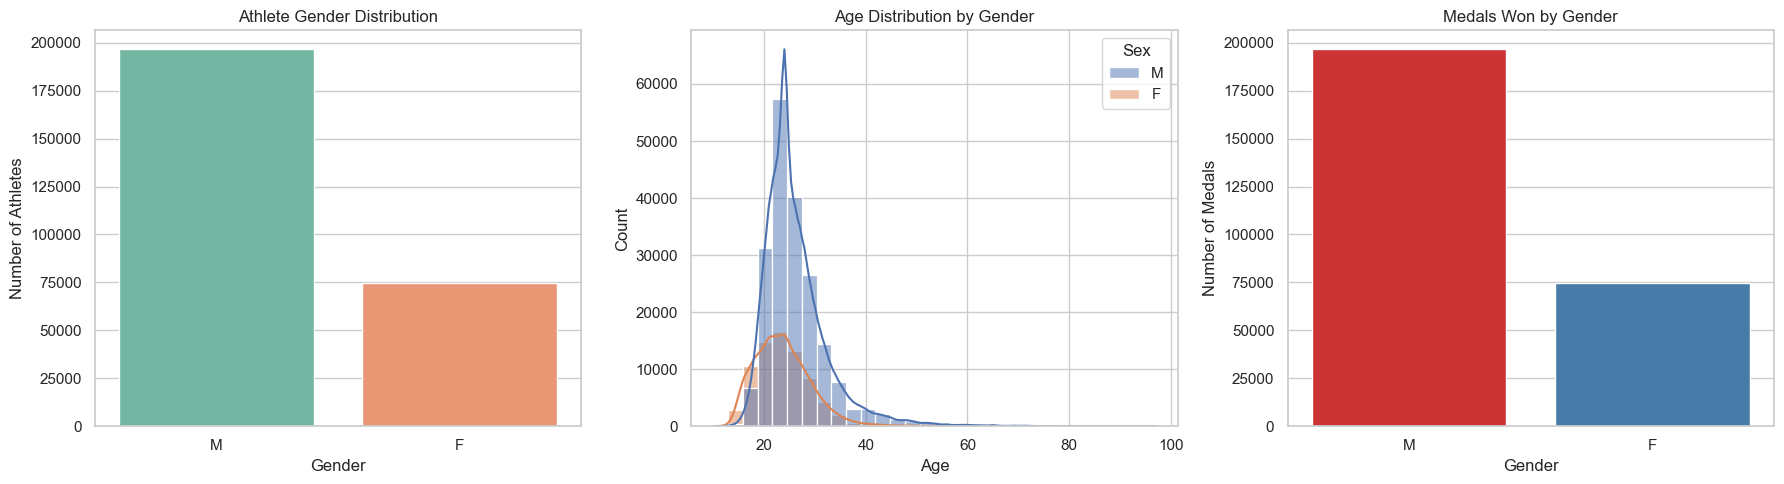

In [22]:
# Set style for plots
sns.set(style="whitegrid")

# Gender distribution
gender_counts = df['Sex'].value_counts()

# Age distribution by gender
age_dist = df.dropna(subset=['Age'])

# Medal count by gender
medal_gender = df.dropna(subset=['Medal'])['Sex'].value_counts()

# Create visualizations
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gender distribution bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axs[0], palette="Set2")
axs[0].set_title('Athlete Gender Distribution')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Number of Athletes')

# Age distribution plot
sns.histplot(data=age_dist, x='Age', hue='Sex', bins=30, kde=True, ax=axs[1])
axs[1].set_title('Age Distribution by Gender')

# Medal counts by gender
sns.barplot(x=medal_gender.index, y=medal_gender.values, ax=axs[2], palette="Set1")
axs[2].set_title('Medals Won by Gender')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Number of Medals')

plt.tight_layout()
plt.savefig("athlete_demographics_analysis.png")
plt.show()


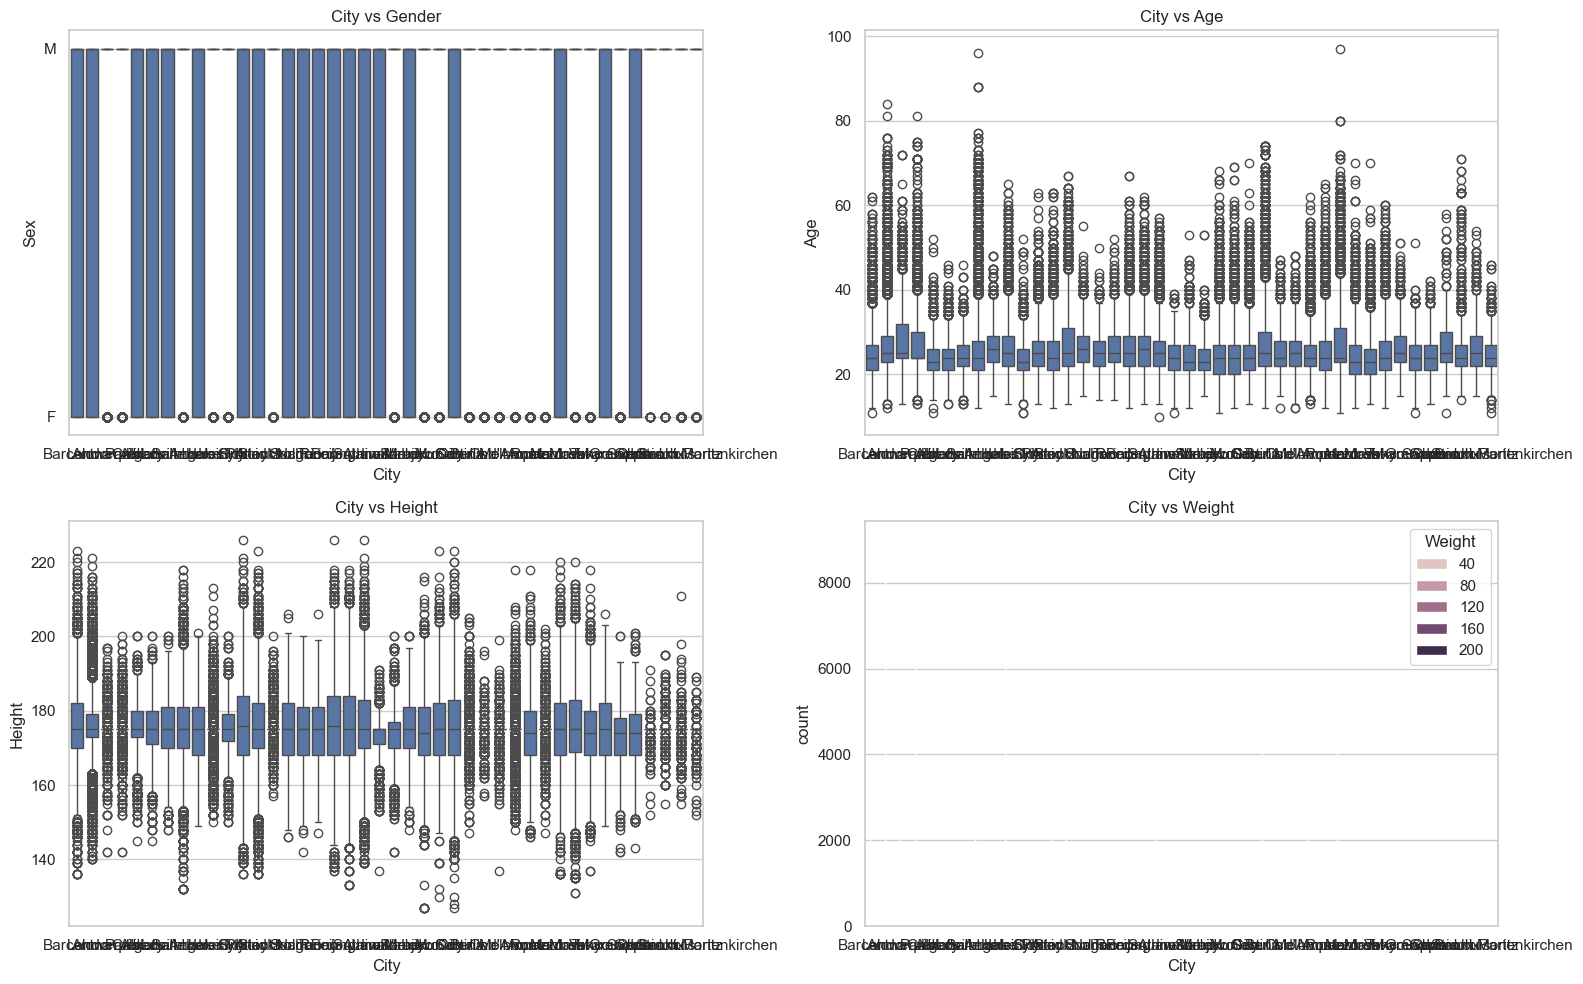

In [23]:
# Prepare the figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Boxplot: Medal vs Age
sns.boxplot(data=df, x='City', y='Sex', ax=axs[0, 0])
axs[0, 0].set_title('City vs Gender')

# Boxplot: Medal vs Height
sns.boxplot(data=df, x='City', y='Age', ax=axs[0, 1])
axs[0, 1].set_title('City vs Age')

# Boxplot: Medal vs Weight
sns.boxplot(data=df, x='City', y='Height', ax=axs[1, 0])
axs[1, 0].set_title('City vs Height')

# Countplot: Medal vs Sex
sns.countplot(data=df, x='City', hue='Weight', ax=axs[1, 1])
axs[1, 1].set_title('City vs Weight')

plt.tight_layout()
plt.show()


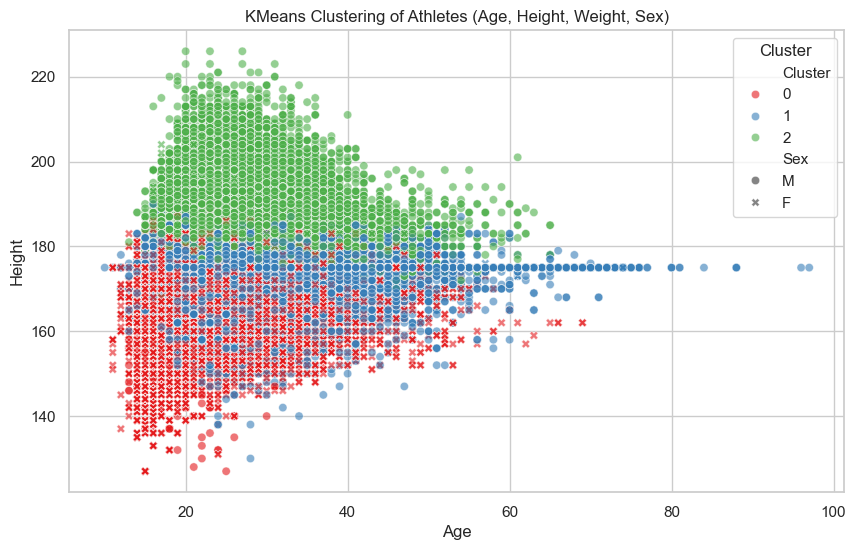

In [24]:
# Encode 'Sex' as numeric for clustering
sex_encoded = df['Sex'].map({'M': 0, 'F': 1})

# Prepare features for clustering
features = df[['Age', 'Height', 'Weight']].copy()
features['Sex'] = sex_encoded

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Perform KMeans clustering (let's use 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Visualize clusters: Age vs Height, colored by cluster and shaped by Sex
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Age', y='Height', hue='Cluster', style='Sex',
    palette='Set1', alpha=0.6
)
plt.title('KMeans Clustering of Athletes (Age, Height, Weight, Sex)')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend(title='Cluster')
plt.show()

In [25]:
# Total cities participated
unique_cities = df['City'].unique()
print(f"Total unique cities: {unique_cities}")

Total unique cities: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


In [ ]:
# Clean and preprocess
df_clean = df[['City', 'Age', 'Height', 'Weight', 'Sex']].dropna()
df_clean['Sex'] = df_clean['Sex'].map({'M': 0, 'F': 1})

# Get 21 unique cities
unique_cities = df_clean['City'].unique()[:21]

# Store results
cluster_results = []

for city in unique_cities:
    city_data = df_clean[df_clean['City'] == city][['Age', 'Height', 'Weight', 'Sex']]
    
    if len(city_data) < 4:
        continue  # skip cities with too few data points
    
    # Standardize features
    scaler = StandardScaler()
    city_scaled = scaler.fit_transform(city_data)
    
    # Apply KMeans (e.g., 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(city_scaled)
    
    # Add cluster labels to original city data
    city_data['Cluster'] = labels
    city_data['City'] = city
    
    cluster_results.append(city_data)

# Combine all cluster-labeled data
final_clusters = pd.concat(cluster_results)

# View a sample
print(final_clusters.head())


      Age  Height  Weight  Sex  Cluster       City
0    24.0   180.0    80.0    0        0  Barcelona
96   24.0   187.0    76.0    0        0  Barcelona
118  34.0   185.0    75.0    0        0  Barcelona
137  22.0   185.0   106.0    0        0  Barcelona
160  31.0   175.0    70.0    0        2  Barcelona


C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\1504859765.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been ass

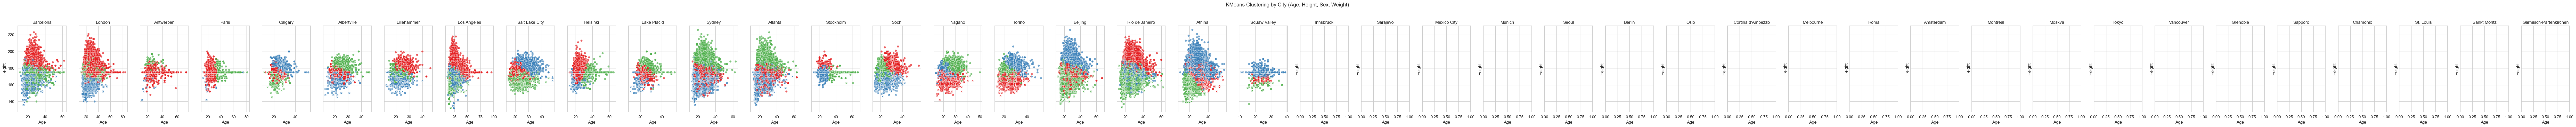

In [28]:
# Visualize KMeans clustering for different cities based on Age, Sex, Height, and Weight

# Select a few example cities for visualization
example_cities = ['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary', 'Albertville',
 'Lillehammer', 'Los Angeles' ,'Salt Lake City', 'Helsinki' ,'Lake Placid',
 'Sydney', 'Atlanta' ,'Stockholm', 'Sochi', 'Nagano' ,'Torino', 'Beijing',
 'Rio de Janeiro', 'Athina', 'Squaw Valley' ,'Innsbruck', 'Sarajevo',
 'Mexico City', 'Munich' ,'Seoul', 'Berlin' ,'Oslo', "Cortina d'Ampezzo",
 'Melbourne', 'Roma' ,'Amsterdam' ,'Montreal', 'Moskva' ,'Tokyo', 'Vancouver',
 'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis' ,'Sankt Moritz',
 'Garmisch-Partenkirchen']

fig, axs = plt.subplots(1, len(example_cities), figsize=(100, 5), sharey=True)

for i, city_name in enumerate(example_cities):
    city_df = final_clusters[final_clusters['City'] == city_name]
    sns.scatterplot(
        data=city_df,
        x='Age',
        y='Height',
        hue='Cluster',
        style='Sex',
        palette='Set1',
        ax=axs[i],
        alpha=0.7,
        legend=False
    )
    axs[i].set_title(f"{city_name}")
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Height')

plt.suptitle('KMeans Clustering by City (Age, Height, Sex, Weight)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Clusting.png")
plt.show()

Correlation Matrix:
              Age    Height    Weight       Sex
Age     1.000000  0.098195  0.139615 -0.149095
Height  0.098195  1.000000  0.785382 -0.461667
Weight  0.139615  0.785382  1.000000 -0.476374
Sex    -0.149095 -0.461667 -0.476374  1.000000


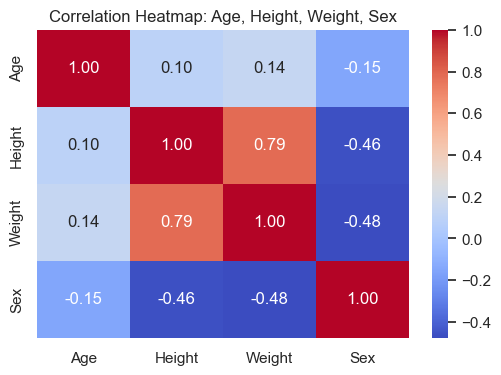

In [29]:
# Correlation analysis for Age, Height, Weight, and Sex
corr_matrix = final_clusters[['Age', 'Height', 'Weight', 'Sex']].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualization: Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Age, Height, Weight, Sex')
plt.show()

Sample of Geographic Stats:
           City  Sex        Age      Height     Weight
0  Albertville    0  24.441646  178.467674  75.343829
1  Albertville    1  23.092979  168.207780  60.871917
2    Antwerpen    0  28.374218  175.205387  70.354738
3    Antwerpen    1  24.373134  172.932836  69.910448
4       Athina    0  26.071607  179.709471  76.715972


C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\988225733.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\988225733.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
C:\Users\ronak_8q45q08\AppData\Local\Temp\ipykernel_8920\988225733.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


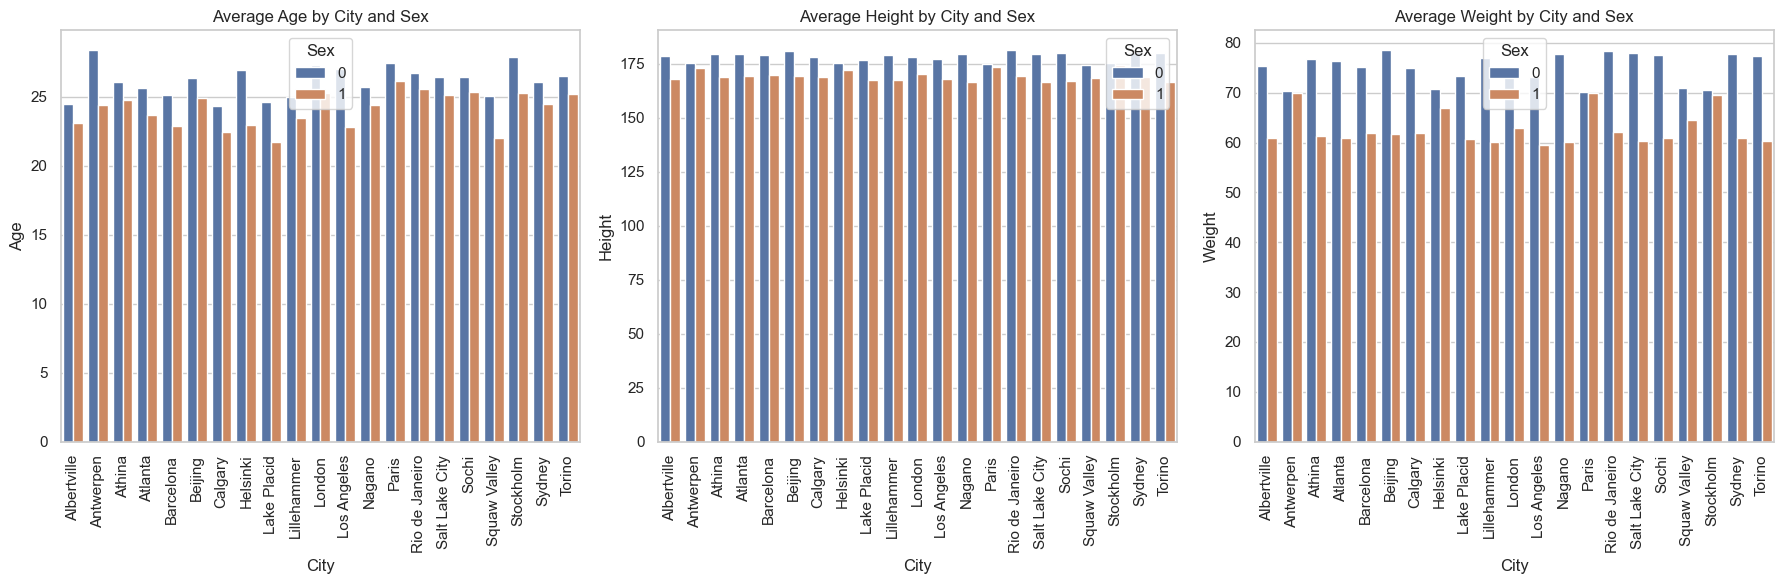

In [30]:
# Geographic analysis: Average Age, Height, Weight by City and Sex
geo_stats = final_clusters.groupby(['City', 'Sex'])[['Age', 'Height', 'Weight']].mean().reset_index()
print("Sample of Geographic Stats:\n", geo_stats.head())

# Visualization: Age, Height, Weight by City and Sex
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
sns.barplot(data=geo_stats, x='City', y='Age', hue='Sex', ax=axs[0])
axs[0].set_title('Average Age by City and Sex')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

sns.barplot(data=geo_stats, x='City', y='Height', hue='Sex', ax=axs[1])
axs[1].set_title('Average Height by City and Sex')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

sns.barplot(data=geo_stats, x='City', y='Weight', hue='Sex', ax=axs[2])
axs[2].set_title('Average Weight by City and Sex')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [31]:
# Extract key information
most_common_city = final_clusters['City'].mode()[0]
avg_age = final_clusters['Age'].mean()
avg_height = final_clusters['Height'].mean()
avg_weight = final_clusters['Weight'].mean()
sex_ratio = final_clusters['Sex'].value_counts(normalize=True)

print(f"Most common city: {most_common_city}")
print(f"Average Age: {avg_age:.2f}")
print(f"Average Height: {avg_height:.2f} cm")
print(f"Average Weight: {avg_weight:.2f} kg")
print(f"Sex ratio (0=Male, 1=Female):\n{sex_ratio}")

Most common city: London
Average Age: 25.81
Average Height: 175.61 cm
Average Weight: 70.82 kg
Sex ratio (0=Male, 1=Female):
Sex
0    0.686846
1    0.313154
Name: proportion, dtype: float64


In [32]:
# Count number of participations from each city and save to CSV, sorted descending
city_participation = df['City'].value_counts().reset_index()
city_participation.columns = ['City', 'Participation_Count']
city_participation.to_csv('city_participation_counts.csv', index=False)
print(city_participation.head())

             City  Participation_Count
0          London                22426
1          Athina                15556
2          Sydney                13821
3         Atlanta                13780
4  Rio de Janeiro                13688


In [34]:
# Find cities from city_participation that have zero participation (if any)
no_participation_cities = city_participation[city_participation['Participation_Count'] == 0]['City'].tolist()
print("Cities with no participation:", no_participation_cities)

Cities with no participation: []
